In [1]:
# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score,cross_val_predict
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve,roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('salary.csv')
data

,index,Nation,purchased_item,salary,age
0,0,India,No,66777.0,23.0
1,1,Russia,Yes,87878.0,24.0
2,2,Germany,No,34559.0,NaN
3,3,India,Yes,40000.0,26.0
4,4,Germany,Yes,NaN,21.0
5,5,Russia,No,45000.0,NaN
6,6,Germany,Yes,89993.0,62.0
7,7,India,No,55555.0,24.0
8,8,Russia,Yes,NaN,45.0
9,9,Germany,Yes,67222.0,53.0


In [3]:
df=pd.DataFrame(data=data)

In [4]:
from sklearn.preprocessing import LabelEncoder    
le=LabelEncoder()
list1=['Nation','purchased_item']
for val in list1:
    df[val]=le.fit_transform(df[val].astype(str))

In [5]:
df

,index,Nation,purchased_item,salary,age
0,0,1,0,66777.0,23.0
1,1,2,1,87878.0,24.0
2,2,0,0,34559.0,NaN
3,3,1,1,40000.0,26.0
4,4,0,1,NaN,21.0
5,5,2,0,45000.0,NaN
6,6,0,1,89993.0,62.0
7,7,1,0,55555.0,24.0
8,8,2,1,NaN,45.0
9,9,0,1,67222.0,53.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
index             10 non-null int64
Nation            10 non-null int32
purchased_item    10 non-null int32
salary            8 non-null float64
age               8 non-null float64
dtypes: float64(2), int32(2), int64(1)
memory usage: 448.0 bytes


In [7]:
df.isnull().sum()

index             0
Nation            0
purchased_item    0
salary            2
age               2
dtype: int64

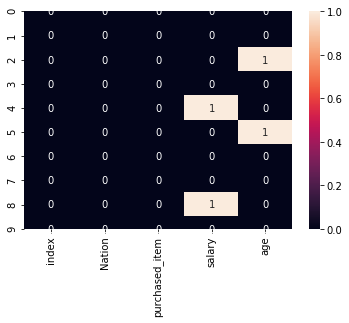

In [8]:
sns.heatmap(df.isnull(),annot=True)

In [9]:
df.corr()

,index,Nation,purchased_item,salary,age
index,1.000000,-0.104782,0.284268,0.058867,0.654998
Nation,-0.104782,1.000000,-0.098295,0.016185,-0.342803
purchased_item,0.284268,-0.098295,1.000000,0.531710,0.431160
salary,0.058867,0.016185,0.531710,1.000000,0.460022
age,0.654998,-0.342803,0.431160,0.460022,1.000000


In [10]:
df.describe()

,index,Nation,purchased_item,salary,age
count,10.00000,10.000000,10.000000,8.000000,8.000000
mean,4.50000,0.900000,0.600000,60873.000000,34.750000
std,3.02765,0.875595,0.516398,20910.535349,16.104569
min,0.00000,0.000000,0.000000,34559.000000,21.000000
25%,2.25000,0.000000,0.000000,43750.000000,23.750000
50%,4.50000,1.000000,1.000000,61166.000000,25.000000
75%,6.75000,1.750000,1.000000,72386.000000,47.000000
max,9.00000,2.000000,1.000000,89993.000000,62.000000


In [11]:
from sklearn.preprocessing import Imputer
imputer=Imputer(missing_values='NaN',strategy='mean',axis=0)
imp=imputer.fit(df)
df_age=imp.fit_transform(df.values)
print(df_age)
df_new=pd.DataFrame(data=df_age,columns=df.columns)
df_new

[[0.0000e+00 1.0000e+00 0.0000e+00 6.6777e+04 2.3000e+01]
 [1.0000e+00 2.0000e+00 1.0000e+00 8.7878e+04 2.4000e+01]
 [2.0000e+00 0.0000e+00 0.0000e+00 3.4559e+04 3.4750e+01]
 [3.0000e+00 1.0000e+00 1.0000e+00 4.0000e+04 2.6000e+01]
 [4.0000e+00 0.0000e+00 1.0000e+00 6.0873e+04 2.1000e+01]
 [5.0000e+00 2.0000e+00 0.0000e+00 4.5000e+04 3.4750e+01]
 [6.0000e+00 0.0000e+00 1.0000e+00 8.9993e+04 6.2000e+01]
 [7.0000e+00 1.0000e+00 0.0000e+00 5.5555e+04 2.4000e+01]
 [8.0000e+00 2.0000e+00 1.0000e+00 6.0873e+04 4.5000e+01]
 [9.0000e+00 0.0000e+00 1.0000e+00 6.7222e+04 5.3000e+01]]


,index,Nation,purchased_item,salary,age
0,0.0,1.0,0.0,66777.0,23.00
1,1.0,2.0,1.0,87878.0,24.00
2,2.0,0.0,0.0,34559.0,34.75
3,3.0,1.0,1.0,40000.0,26.00
4,4.0,0.0,1.0,60873.0,21.00
5,5.0,2.0,0.0,45000.0,34.75
6,6.0,0.0,1.0,89993.0,62.00
7,7.0,1.0,0.0,55555.0,24.00
8,8.0,2.0,1.0,60873.0,45.00
9,9.0,0.0,1.0,67222.0,53.00


In [12]:
df_new.skew()

index             0.000000
Nation            0.223451
purchased_item   -0.484123
salary            0.296409
age               0.970209
dtype: float64

In [13]:
for i in df_new.columns:
    if df_new.skew().loc[i]>0.55:
        df_new[i]=np.log1p(df_new[i])

In [14]:
df_new.skew()

index             0.000000
Nation            0.223451
purchased_item   -0.484123
salary            0.296409
age               0.599433
dtype: float64

In [15]:
from scipy.stats import zscore
z=np.abs(zscore(df_new))
print(df_new.shape)
df_age=df_new.loc[(z<3).all(axis=1)]
print(df_age.shape)

(10, 5)
(10, 5)


index                AxesSubplot(0.125,0.536818;0.110714x0.343182)
Nation            AxesSubplot(0.257857,0.536818;0.110714x0.343182)
purchased_item    AxesSubplot(0.390714,0.536818;0.110714x0.343182)
salary            AxesSubplot(0.523571,0.536818;0.110714x0.343182)
age               AxesSubplot(0.656429,0.536818;0.110714x0.343182)
dtype: object

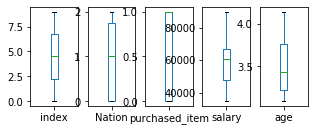

In [16]:
df_age.plot(kind='box',subplots=True,layout=(2,6))

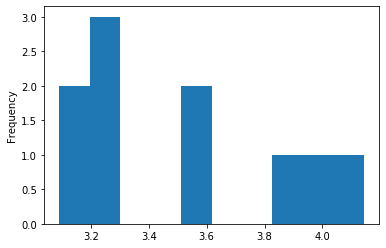

In [17]:
df_age['age'].plot.hist()

In [18]:
df_age.skew()

index             0.000000
Nation            0.223451
purchased_item   -0.484123
salary            0.296409
age               0.599433
dtype: float64

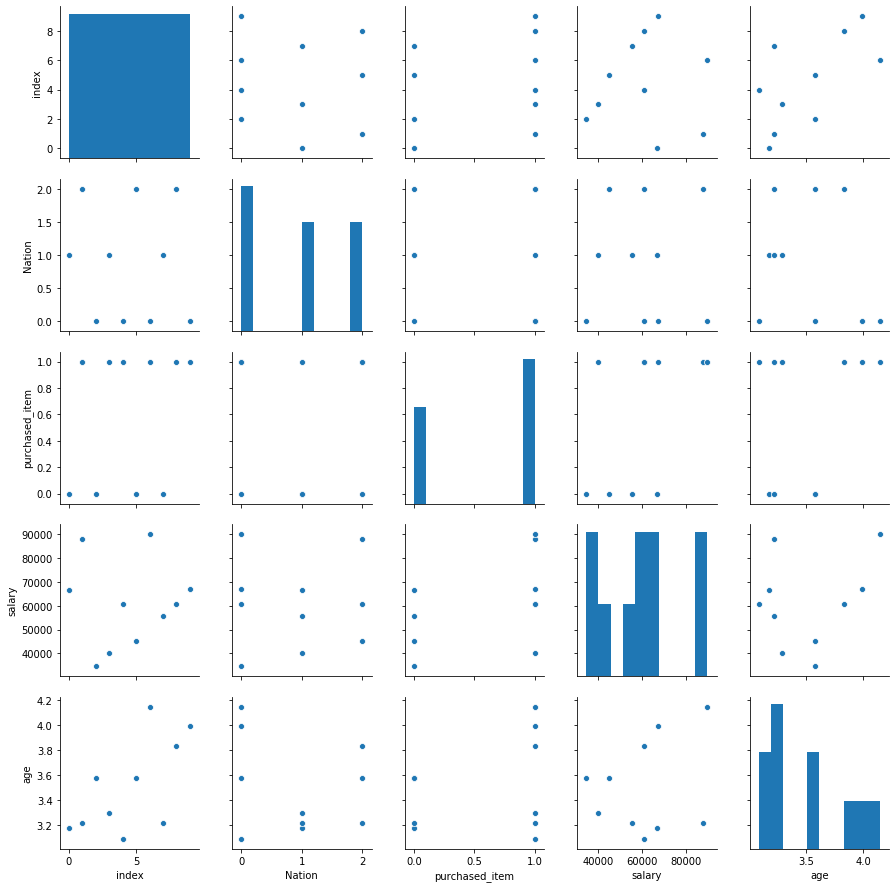

In [19]:
sns.pairplot(df_age)

(5.0, 0.0)

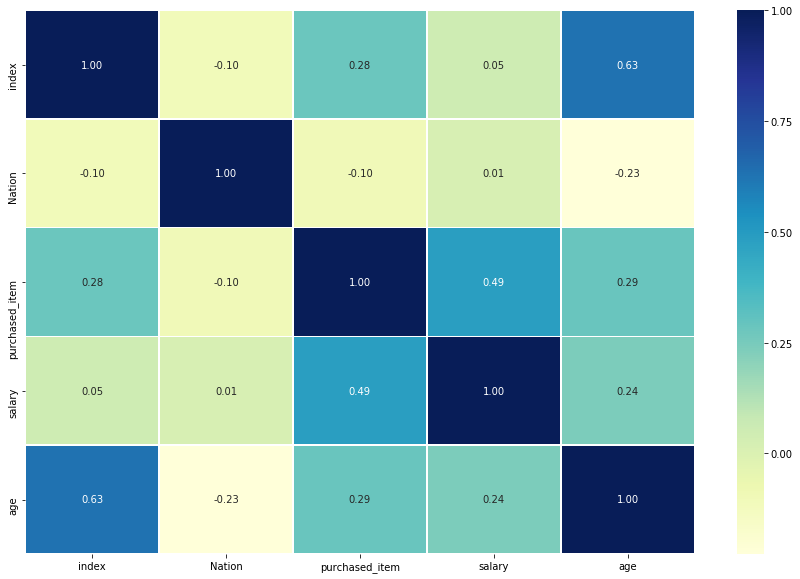

In [20]:
corr_matrix = df_age.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [21]:
y=df_age['purchased_item']
y

0    0.0
1    1.0
2    0.0
3    1.0
4    1.0
5    0.0
6    1.0
7    0.0
8    1.0
9    1.0
Name: purchased_item, dtype: float64

In [22]:
x=df_age.drop('purchased_item',axis=1)
x

,index,Nation,salary,age
0,0.0,1.0,66777.0,3.178054
1,1.0,2.0,87878.0,3.218876
2,2.0,0.0,34559.0,3.576550
3,3.0,1.0,40000.0,3.295837
4,4.0,0.0,60873.0,3.091042
5,5.0,2.0,45000.0,3.576550
6,6.0,0.0,89993.0,4.143135
7,7.0,1.0,55555.0,3.218876
8,8.0,2.0,60873.0,3.828641
9,9.0,0.0,67222.0,3.988984


In [23]:
df_age["purchased_item"].value_counts()

1.0    6
0.0    4
Name: purchased_item, dtype: int64

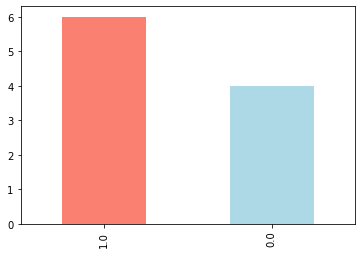

In [24]:
df_age["purchased_item"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [25]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(x)

In [26]:
max_acc_score=0
for acc_state in range(42,100):      
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=acc_state,test_size=.20)
    rm=RandomForestClassifier(n_estimators=100)
    rm.fit(x_train,y_train)
    y_predrm=rm.predict(x_test)
    accuracy_score1=accuracy_score(y_test,y_predrm)
    if accuracy_score1 > max_acc_score:
        max_acc_score=accuracy_score1
        final_acc_state=acc_state
print('max acc score corresponding to',final_acc_state,'is:', max_acc_score)

max acc score corresponding to 85 is: 1.0


In [27]:
max_acc_score=0
for acc_state in range(42,100):      
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=acc_state,test_size=.22)
    lg=LogisticRegression()
    lg.fit(x_train,y_train)
    y_predlg=lg.predict(x_test)
    accuracy_score1=accuracy_score(y_test,y_predlg)
    if accuracy_score1 > max_acc_score:
        max_acc_score=accuracy_score1
        final_acc_state=acc_state
print('max acc score corresponding to',final_acc_state,'is:', max_acc_score)

max acc score corresponding to 79 is: 1.0


In [28]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
models = {"Random Forest": RandomForestClassifier(n_estimators=100),
          "Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "GaussianNB":GaussianNB(),
          "SVC":SVC(),
          "DecisionTreeClassifier":DecisionTreeClassifier(),
          "GradientBoostingClassifier":GradientBoostingClassifier()
         }
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=85,test_size=.20)

# Create a function to fit and score models
def fit_and_score(models, x_train, x_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Make a dictionary to keep model scores
    model_acc_scores = {}
    # Loop through models
    for name, model in models.items():
        y_pred1=0
        # Fit the model to the data
        model.fit(x_train, y_train)
        y_pred1=model.predict(x_test)
        # Evaluate the model and append its score to model_scores
        model_acc_scores[name] = accuracy_score(y_test,y_pred1)

    return model_acc_scores

In [29]:
model_acc_scores = fit_and_score(models=models,
                             x_train=x_train,
                             x_test=x_test,
                             y_train=y_train,
                             y_test=y_test,
                             )

model_acc_scores

{'Random Forest': 1.0,
 'Logistic Regression': 1.0,
 'KNN': 0.0,
 'GaussianNB': 1.0,
 'SVC': 1.0,
 'DecisionTreeClassifier': 1.0,
 'GradientBoostingClassifier': 1.0}

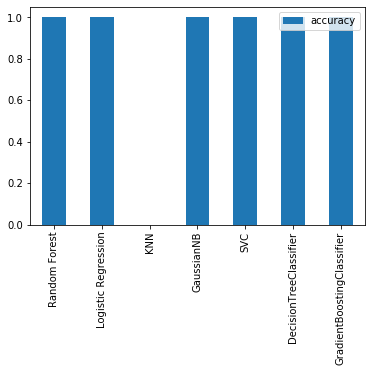

In [30]:
model_compare = pd.DataFrame(model_acc_scores, index=["accuracy"])
model_compare.T.plot.bar()

In [31]:
def evaluate_preds(y_test, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels.
    """
    accuracy = accuracy_score(y_test, y_preds)
    precision = precision_score(y_test, y_preds)
    recall = recall_score(y_test, y_preds)
    f1 = f1_score(y_test, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2), 
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")

    return metric_dict


In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=79,test_size=.22)
lg=LogisticRegression()
lg.fit(x_train,y_train)
y_predlg=lg.predict(x_test)
accuracy_score1=accuracy_score(y_test,y_predlg)
print('Confusion Matrix:',confusion_matrix(y_test,y_predlg))
print('Classification Report:',classification_report(y_test,y_predlg))

Confusion Matrix: [[1 0]
 [0 2]]
Classification Report:               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         1
         1.0       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [33]:
# Make predictions with probabilities
y_probs = lg.predict_proba(x_test)

# Keep the probabilites of the positive class only
y_probs = y_probs[:, 1]

# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Check the false positive rate
fpr

array([0., 0., 0., 1.])

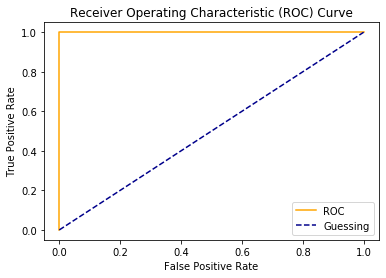

In [34]:
def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positve rate (fpr) and 
    true postive rate (tpr) of a classifier.
    """
    # Plot ROC curve
    plt.plot(fpr, tpr, color='orange', label='ROC')
    # Plot line with no predictive power (baseline)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='Guessing')
    # Customize the plot
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)

In [35]:
roc_auc_score(y_test, y_probs)

1.0

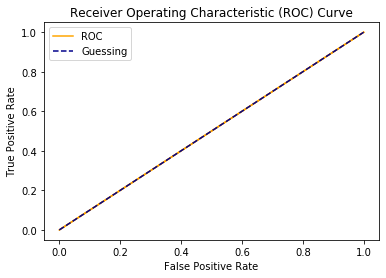

In [36]:
plot_roc_curve(y_predlg, y_test)

In [37]:
y_predlg1 = evaluate_preds(y_test, y_predlg)
y_predlg1

Acc: 100.00%
Precision: 1.00
Recall: 1.00
F1 score: 1.00


{'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0, 'f1': 1.0}

In [38]:
from sklearn.externals import joblib
joblib.dump(lg,'salary_pred1.pkl')

['salary_pred1.pkl']

In [40]:
lg_from_joblib=joblib.load('salary_pred1.pkl')
joblib_y_preds = lg_from_joblib.predict(x_test)
evaluate_preds(y_test, joblib_y_preds)

Acc: 100.00%
Precision: 1.00
Recall: 1.00
F1 score: 1.00


{'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0, 'f1': 1.0}